In [10]:
%matplotlib inline
import pynbody
from pynbody.analysis import profile
import matplotlib.pylab as plt
import numpy as np
import astropy.units as u
import os

In [11]:
from cog import compute_cog
from snap_io import load_moria_sim_and_kicked, load_sim, moria_path, kicked_path

In [12]:
SIM_NUMBER = 71002

In [13]:
# kicked_sim = load_sim(os.path.join(kicked_path, 'sim{}/out'.format(SIM_NUMBER)))
# len(kicked_sim)

In [14]:
# times_moria, cog_kicked = compute_cog(kicked_sim, cache_file='cog{}_kicked.npz'.format(SIM_NUMBER), verbose=False);

In [15]:
def get_cog(sim_number):
    kicked_sim = load_sim(os.path.join(kicked_path, 'sim{}/out'.format(sim_number)))
    print("Loaded {} snaps of sim{}".format(len(kicked_sim), sim_number))
    times, cog = compute_cog(kicked_sim, cache_file='cog{}_kicked.npz'.format(sim_number), verbose=False);
    return times, cog

In [16]:
def plot_cog_path(cog_kicked, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.set_xlabel("x (kpc)")
    ax.set_ylabel("y (kpc)")
    ax.scatter(*cog_kicked[:2], marker='o')
    ax.plot((0,0), '')
    c1, c2 = plt.Circle((0,0), radius=1000, fill=False), plt.Circle((0,0), radius=200, fill=False)
    ax.add_artist(c1)
    ax.add_artist(c2)
    ax.axis('equal')
    ax.grid()
    r = np.sqrt(cog_kicked[0,:]**2+cog_kicked[1,:]**2+cog_kicked[2,:]**2)
    r[:-10].min(), r.max()

In [17]:
sim_list = (62002, 68002, 71002)

In [18]:
times_list = list()
cog_list = list()
for sim in sim_list:
    times, cog = get_cog(sim)
    times_list.append(times)
    cog_list.append(cog)
import gc
gc.collect()

Loaded 95 snaps of sim62002
Loaded 95 snaps of sim68002
Loaded 95 snaps of sim71002


19716

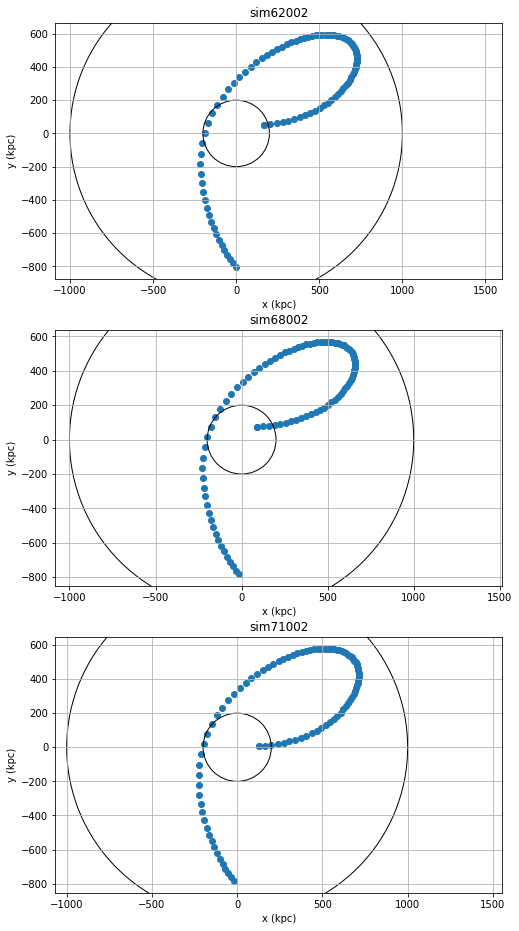

In [19]:
fig, axes = plt.subplots(3, figsize=(8,16))
for cog, sim, ax in zip(cog_list, sim_list, axes):
    plot_cog_path(cog, ax)
    ax.set_title("sim{}".format(sim))

NameError: name 'cog_kicked' is not defined

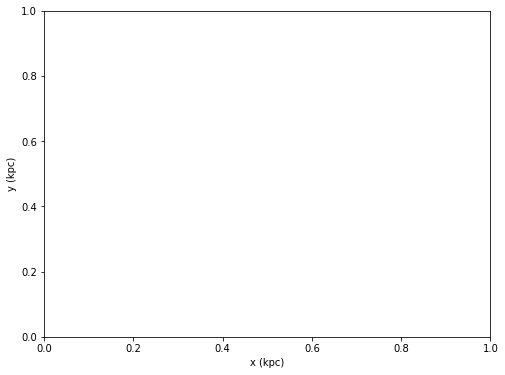

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlabel("x (kpc)")
ax.set_ylabel("y (kpc)")
ax.scatter(*cog_kicked[:2], marker='o')
ax.plot((0,0), '')
c1, c2 = plt.Circle((0,0), radius=1000, fill=False), plt.Circle((0,0), radius=200, fill=False)
ax.add_artist(c1)
ax.add_artist(c2)
ax.axis('equal')
ax.grid()
r = np.sqrt(cog_kicked[0,:]**2+cog_kicked[1,:]**2+cog_kicked[2,:]**2)
r[:-10].min(), r.max()